# convert npy into tif for visualization

In [1]:
# import the necessary packages
import imutils
import matplotlib.pyplot as plt

import os
import numpy as np
from scipy import ndimage
from tqdm import tqdm  # ! this might result into problem with 'object'
import pandas as pd
import random
import glob
from skimage import io

import argparse
import time
import cv2

import tifffile

In [2]:
# visualization for two images

def subShow(IMG1, IMG2):
    plt.figure()
    plt.axis('off')
    plt.subplot(1,2,1)
    plt.imshow(IMG1, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(IMG2, cmap='gray')
    plt.show()
    
# write a stack of image in tif
def writeStack(stack, path, name):
#     with tifffile.TiffWriter(path+'/' + 'fMax.tif') as tif:
    with tifffile.TiffWriter(path+'/' + name) as tif:
      for i in range(stack.shape[0]):
        filename = f"image_{i}"
        tif.save(stack[i,...], photometric='minisblack', description=filename, metadata=None)

## load in data

In [18]:
# load path

PLACE = 'val'
data_path = '/bigdata/casus/MLID/RuiLi/Data/LM/zebrafish_15_2_2/final/' + str(PLACE) + '/'

targetStacks = np.load(data_path + str(PLACE) + '_mask_Variance.npy')
print(targetStacks.shape, targetStacks.max(), targetStacks.dtype)
print('load position:', data_path + str(PLACE) + '_mask_Variance.npy')

(2, 20, 1040, 1392) 1 uint8
load position: /bigdata/casus/MLID/RuiLi/Data/LM/zebrafish_15_2_2/final/val/val_mask_Variance.npy


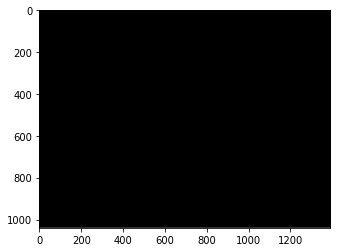

In [19]:
plt.imshow(targetStacks[0,0,:,:], cmap='gray')

## write

In [20]:
writeStack(targetStacks*255, './', str(PLACE) + '_mask_Variance.tif')

print('write file:', str(PLACE) + '_mask_Variance.tif')

write file: val_mask_Variance.tif
